In [16]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


Visualization for yearly vehicle distributions, monthly precipitation & max. temperature

**Load data**

In [36]:
fuel_types = ['electric','plug-in hybrid electric','fuel cell','diesel','flex fuel','gasoline','gasoline hybrid','natural gas fuel','propane']

# yearly vehicle distributions

vehicles = pd.read_csv('data/cleaned/yearly_vehicles_reformat.csv')

print(f"shape: {vehicles.shape}")
vehicles.head()

shape: (12, 10)


,year,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas fuel,propane
0,2021,522445,305315,10127,590216,1208970,25998618,1298275,8461,90
1,2020,369364,259109,7129,700366,1144536,25021380,1155477,7676,897
2,2019,308447,251522,6933,680622,1131474,25526368,1114944,8462,1015
3,2018,232239,216328,5525,657857,1122312,25377093,1060166,8910,1063
4,2017,159705,163057,3271,640281,1108886,25313468,1019085,9212,1074


In [53]:
# monthly vehicle distributions

month_vehicles = pd.read_csv('data/cleaned/new_monthly_vehicles.csv')
month_vehicles = month_vehicles.drop(columns=['Unnamed: 0'])

print(f"shape: {month_vehicles.shape}")
month_vehicles.head()

shape: (132, 12)


,date,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas fuel,propane,total,date_idx
0,202112,522445,305315,10127,590216,1208970,25998618,1298275,8461,90,29942517,132
1,202111,505951,300973,9877,599395,1203600,25917181,1285769,8395,157,29836132,131
2,202110,490400,297256,9627,608574,1198231,25835745,1275167,8330,224,29729751,130
3,202109,476248,292462,9377,617753,1192861,25754308,1263823,8264,291,29623366,129
4,202108,462251,289169,9127,626932,1187492,25672872,1253083,8199,359,29516987,128


In [41]:
# Monthly maximum temperature in each CA county (degrees Fahrenheit)

tmax = pd.read_csv('data/cleaned/monthly_tmax_reformat.csv')
tmax = tmax.drop(columns=['Unnamed: 0'])

print(tmax.shape)
tmax.head()

(95, 61)


,date,county 1 tmax,county 3 tmax,county 5 tmax,county 7 tmax,county 9 tmax,county 11 tmax,county 13 tmax,county 15 tmax,county 17 tmax,...,county 101 tmax,county 103 tmax,county 105 tmax,county 107 tmax,county 109 tmax,county 111 tmax,county 113 tmax,county 115 tmax,mean tmax,date_idx
0,201501,61.0,48.5,59.9,61.0,60.2,61.9,60.1,54.7,57.2,...,60.6,61.0,54.5,53.1,54.4,64.1,61.2,61.4,59.558621,1
1,201502,65.4,50.9,63.7,65.3,64.8,67.3,66.1,55.9,59.4,...,67.8,63.5,57.6,60.8,57.4,66.4,67.3,66.3,64.100000,2
2,201503,70.8,53.5,69.3,71.3,70.0,74.6,72.2,60.7,63.8,...,76.1,69.1,64.1,65.5,60.7,71.4,74.5,72.5,69.410345,3
3,201504,69.6,52.2,68.4,72.2,69.3,76.2,71.6,60.9,63.1,...,78.1,70.8,64.9,65.1,59.6,68.6,76.8,73.3,69.055172,4
4,201505,68.8,55.9,72.7,76.8,73.2,80.0,71.1,67.3,67.5,...,81.5,75.4,71.7,67.9,62.3,68.7,79.4,77.7,71.446552,5


In [42]:
# Monthly average precipitation in each CA county (inches)

precip = pd.read_csv('data/cleaned/monthly_precip_reformat.csv')
precip = precip.drop(columns=['Unnamed: 0'])

print(precip.shape)
precip.head()

(95, 61)


,date,county 1 precip,county 3 precip,county 5 precip,county 7 precip,county 9 precip,county 11 precip,county 13 precip,county 15 precip,county 17 precip,...,county 101 precip,county 103 precip,county 105 precip,county 107 precip,county 109 precip,county 111 precip,county 113 precip,county 115 precip,mean precip,date_idx
0,201501,0.01,0.22,0.14,0.21,0.13,0.18,0.01,3.49,0.12,...,0.10,0.25,1.79,0.47,0.14,1.97,0.06,0.08,0.440345,1
1,201502,2.25,5.53,5.36,4.58,5.26,3.66,2.34,11.17,6.96,...,2.49,4.29,11.74,2.29,5.12,0.88,3.20,4.42,3.597241,2
2,201503,0.26,0.62,0.83,0.58,0.64,0.54,0.26,5.65,0.87,...,0.17,1.04,2.53,0.43,0.68,0.69,0.17,0.48,0.722759,3
3,201504,1.15,2.52,3.09,2.24,2.64,1.78,1.09,4.36,3.41,...,1.52,1.76,2.03,0.87,3.29,0.32,1.31,2.75,1.556897,4
4,201505,0.37,2.99,1.39,0.29,1.18,0.08,0.20,0.68,1.96,...,0.03,0.61,1.23,1.76,2.70,0.61,0.10,0.17,0.862759,5


**Yearly registered vehicles in California by fuel source over time**

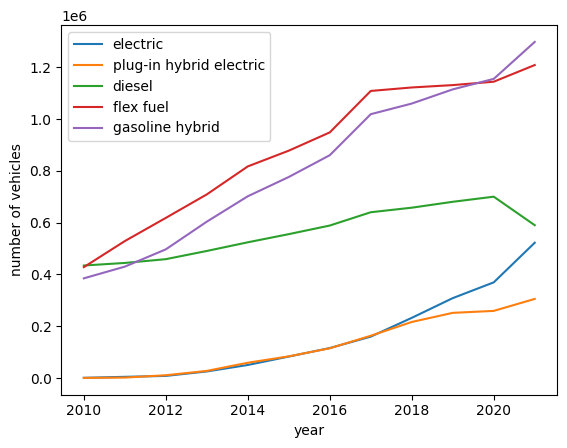

In [38]:
low_values = ['propane', 'natural gas fuel', 'fuel cell']
high_values = ['gasoline']
for fuel in fuel_types:
    if fuel not in low_values and fuel not in high_values:
        plt.plot(vehicles['year'], vehicles[fuel], label=fuel)
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.legend()
plt.show()

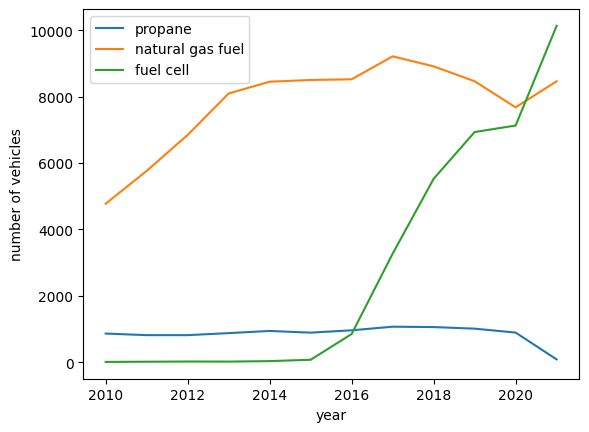

In [39]:
for fuel in low_values:
    plt.plot(vehicles['year'], vehicles[fuel], label=fuel)
plt.legend()
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.show()

Propane-, natural gas-, and fuel cell-powered vehicles are shown separately because there are very few

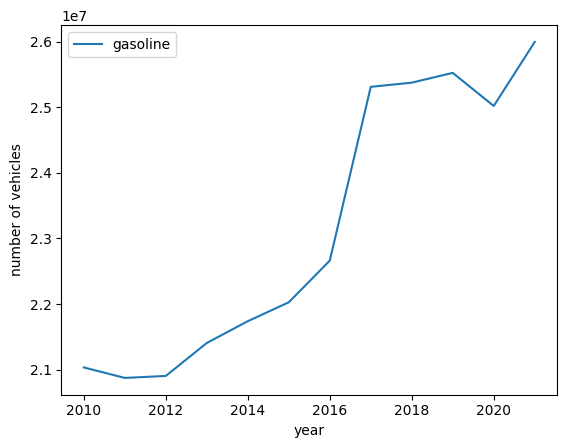

In [40]:
plt.plot(vehicles['year'], vehicles['gasoline'], label='gasoline')
plt.legend()
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.show()

Gasoline-powered vehicles are shown separately because they are by far the most numerous

**Monthlye vehicle growth**

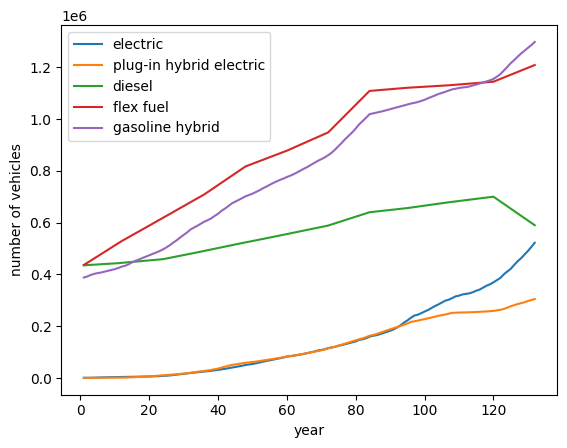

In [55]:
for fuel in fuel_types:
    if fuel not in low_values and fuel not in high_values:
        plt.plot(month_vehicles['date_idx'], month_vehicles[fuel], label=fuel)
plt.ylabel('number of vehicles')
plt.xlabel('year')
plt.legend()
plt.show()

**Monthly maximum temperature and average precipitation in California**

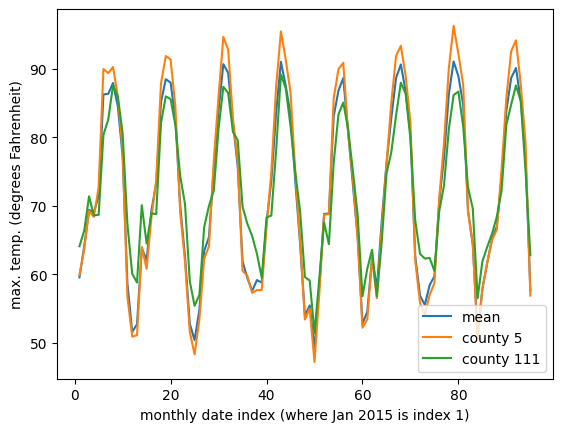

In [49]:
# Maximum temperature per month for a sample of counties from data with state-wide mean

plt.plot(tmax['date_idx'],tmax['mean tmax'])
plt.plot(tmax['date_idx'],tmax['county 5 tmax'])
plt.plot(tmax['date_idx'],tmax['county 111 tmax'])
plt.legend(['mean','county 5','county 111'])
plt.xlabel('monthly date index (where Jan 2015 is index 1)')
plt.ylabel('max. temp. (degrees Fahrenheit)')
plt.show()

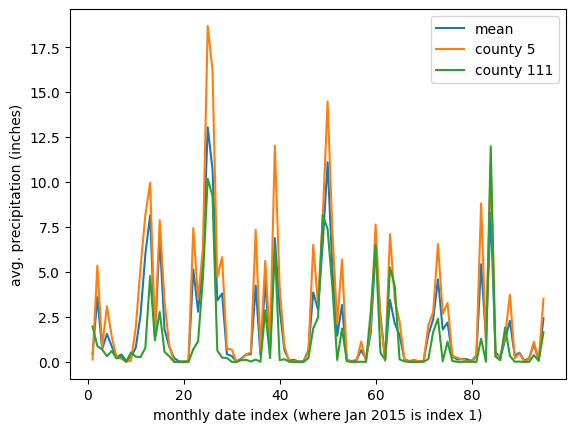

In [50]:
# Average precipitation per month for the state of CA

plt.plot(precip['date_idx'],precip['mean precip'])
plt.plot(precip['date_idx'],precip['county 5 precip'])
plt.plot(precip['date_idx'],precip['county 111 precip'])
plt.legend(['mean','county 5','county 111'])
plt.xlabel('monthly date index (where Jan 2015 is index 1)')
plt.ylabel('avg. precipitation (inches)')
plt.show()